In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

In [3]:
img_rows=28
img_cols=28
channels=1

img_shape=(img_rows,img_cols,channels)

z_dim=100

In [4]:
def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add (Dense(128, input_dim = z_dim))
    model.add (LeakyReLU(alpha=0.01))
    model.add (Dense(28*28*1, activation='tanh')) 
    model.add(Reshape(img_shape))
    return model

In [5]:
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [6]:
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics=['Accuracy'])

generator = build_generator(img_shape, z_dim)
generator.trainable = False

gan = build_gan(generator,discriminator)
gan.compile (loss='binary_crossentropy', optimizer=Adam())

In [7]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):

    (X_train, _), (_, _) = mnist.load_data()

    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))

    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):



        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)



        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)


In [10]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)

    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

11493376/11490434 [==============================] - 1s 0us/step
1000 [D loss: nan, acc.: 0.00%] [G loss: nan]
2000 [D loss: nan, acc.: 0.00%] [G loss: nan]
3000 [D loss: nan, acc.: 0.00%] [G loss: nan]
4000 [D loss: nan, acc.: 0.00%] [G loss: nan]
5000 [D loss: nan, acc.: 0.00%] [G loss: nan]
6000 [D loss: nan, acc.: 0.00%] [G loss: nan]
7000 [D loss: nan, acc.: 0.00%] [G loss: nan]
8000 [D loss: nan, acc.: 0.00%] [G loss: nan]
9000 [D loss: nan, acc.: 0.00%] [G loss: nan]
10000 [D loss: nan, acc.: 0.00%] [G loss: nan]
11000 [D loss: nan, acc.: 0.00%] [G loss: nan]
12000 [D loss: nan, acc.: 0.00%] [G loss: nan]
13000 [D loss: nan, acc.: 0.00%] [G loss: nan]
14000 [D loss: nan, acc.: 0.00%] [G loss: nan]
15000 [D loss: nan, acc.: 0.00%] [G loss: nan]
16000 [D loss: nan, acc.: 0.00%] [G loss: nan]
17000 [D loss: nan, acc.: 0.00%] [G loss: nan]
18000 [D loss: nan, acc.: 0.00%] [G loss: nan]
19000 [D loss: nan, acc.: 0.00%] [G loss: nan]
20000 [D loss: nan, acc.: 0.00%] [G loss: nan]


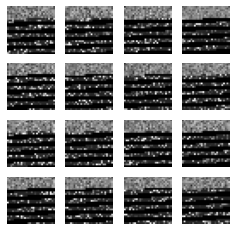

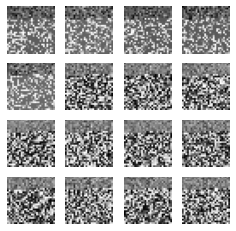

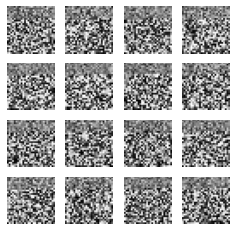

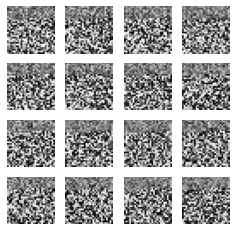

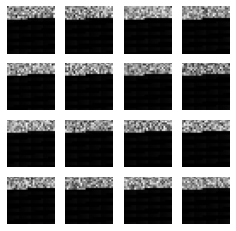

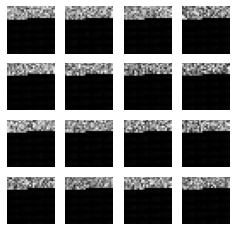

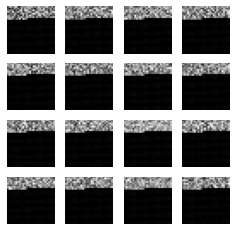

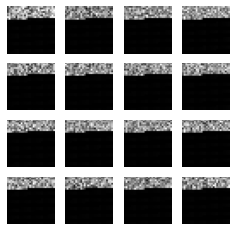

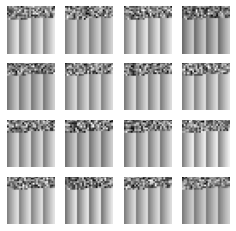

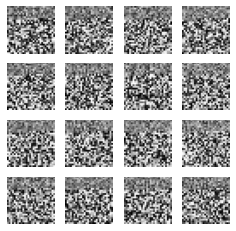

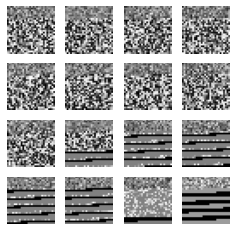

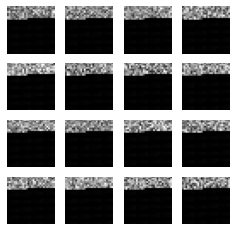

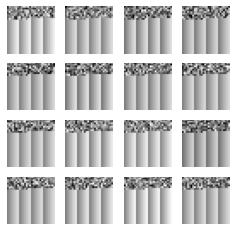

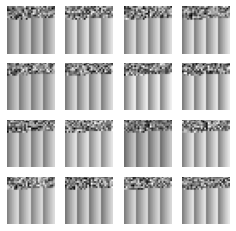

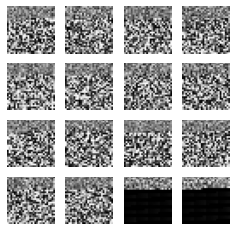

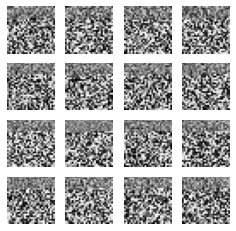

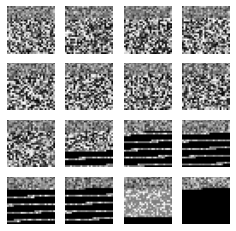

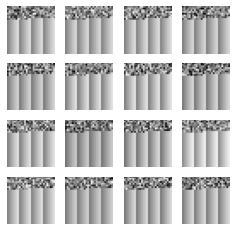

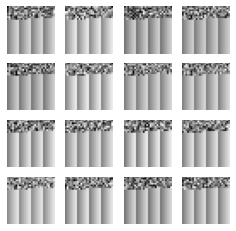

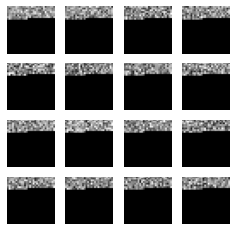

In [11]:
iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval)